In [1]:
#récupération de l'ap de bigml

from bigml.api import BigML
from pandas import read_csv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import pandas as pan
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
#charge de l'api bigml pour pouvoir faire appel à ces fonctions

api = BigML(project='project/5d94a451eba31d46690001cf')

### récupération du fichier train full

In [13]:
#récupération du fichier csv bigml à traiter
train_full = api.create_source('./train_full.csv')

#test des sources
api.ok(train_full)

#création dataset depuis le fichier csv importer précédement
train_full_dataset = api.create_dataset(train_full)

### split du fichier train full 

In [14]:
#split du train full

train_dataset = api.create_dataset(
    train_full_dataset, {"name": "Train (80%)",
                     "sample_rate": 0.8, "seed": "Full train"})
validation_dataset = api.create_dataset(
    train_full_dataset, {"name": "Train (20%)",
                     "sample_rate": 0.8, "seed": "Full train",
                     "out_of_bag": True})

In [15]:
#split du train
def split(percent):
    train_split = api.create_dataset(
                    train_full_dataset, {"name": "Train (80%)",
                     "sample_rate": percent, "seed": "Full train"})
    api.ok(train_split)
    return train_split

In [16]:
#train suivant les differents percent
split_10 = split(1/10)
split_20 = split(2/10)
split_30 = split(3/10)
split_40 = split(4/10)
split_50 = split(5/10)
split_60 = split(6/10)
split_70 = split(7/10)
split_80 = split(8/10)
split_90 = split(9/10)
split_100 = split(10/10)

## calcul des models

In [17]:
# fonction de calcul du model ensemble
def ensemble(train):
    ensemble = api.create_ensemble(train,{"objective_field":"SeriousDlqin2yrs"})
    api.ok(ensemble)
    return ensemble

In [18]:
# fonction de calcul du model deepnet
def deepnet(train):
    deepnet = api.create_deepnet(train,{"objective_field":"SeriousDlqin2yrs"})
    api.ok(deepnet)
    return deepnet

In [22]:
# model ensemble
ensemble_10 = ensemble(split_10)
ensemble_20 = ensemble(split_20)
ensemble_30 = ensemble(split_30)
ensemble_40 = ensemble(split_40)
ensemble_50 = ensemble(split_50)
ensemble_60 = ensemble(split_60)
ensemble_70 = ensemble(split_70)
ensemble_80 = ensemble(split_80)
ensemble_90 = ensemble(split_90)
ensemble_100 = ensemble(split_100)

In [23]:
# model deepnet
deepnet_10 = deepnet(split_10)
deepnet_20 = deepnet(split_20)
deepnet_30 = deepnet(split_30)
deepnet_40 = deepnet(split_40)
deepnet_50 = deepnet(split_50)
deepnet_60 = deepnet(split_60)
deepnet_70 = deepnet(split_70)
deepnet_80 = deepnet(split_80)
deepnet_90 = deepnet(split_90)
deepnet_100 = deepnet(split_100)

## prédictions à partir d'un model

In [26]:
def batchprediction(model, train):
    batch_prediction = api.create_batch_prediction(model, train,{"header": True, "all_fields": True,
                                                  "prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction)
    return batch_prediction

In [61]:
# calcul des prédictions avec 10 percent
prediction_ens_val_10 = batchprediction(ensemble_10, validation_dataset)
api.download_batch_prediction(prediction_ens_val_10,filename='BatchPrediction/prediction_ens_val_10.csv')

prediction_dee_val_10 = batchprediction(deepnet_10, validation_dataset)
api.download_batch_prediction(prediction_dee_val_10,filename='BatchPrediction/prediction_dee_val_10.csv')

prediction_ens_spl_10 = batchprediction(ensemble_10, split_10)
api.download_batch_prediction(prediction_ens_spl_10,filename='BatchPrediction/prediction_ens_spl_10.csv')

prediction_dee_spl_10 = batchprediction(deepnet_10, split_10)
api.download_batch_prediction(prediction_dee_spl_10,filename='BatchPrediction/prediction_dee_spl_10.csv')

'BatchPrediction/prediction_dee_spl_10.csv'

In [62]:
# calcul des prédictions avec 20 percent
prediction_ens_val_20 = batchprediction(ensemble_20, validation_dataset)
api.download_batch_prediction(prediction_ens_val_20,filename='BatchPrediction/prediction_ens_val_20.csv')

prediction_dee_val_20 = batchprediction(deepnet_20, validation_dataset)
api.download_batch_prediction(prediction_dee_val_20,filename='BatchPrediction/prediction_dee_val_20.csv')

prediction_ens_spl_20 = batchprediction(ensemble_20, split_20)
api.download_batch_prediction(prediction_ens_spl_20,filename='BatchPrediction/prediction_ens_spl_20.csv')

prediction_dee_spl_20 = batchprediction(deepnet_20, split_20)
api.download_batch_prediction(prediction_dee_spl_20,filename='BatchPrediction/prediction_dee_spl_20.csv')

'BatchPrediction/prediction_dee_spl_20.csv'

In [63]:
# calcul des prédictions avec 30 percent
prediction_ens_val_30 = batchprediction(ensemble_30, validation_dataset)
api.download_batch_prediction(prediction_ens_val_30,filename='BatchPrediction/prediction_ens_val_30.csv')

prediction_dee_val_30 = batchprediction(deepnet_30, validation_dataset)
api.download_batch_prediction(prediction_dee_val_30,filename='BatchPrediction/prediction_dee_val_30.csv')

prediction_ens_spl_30 = batchprediction(ensemble_30, split_30)
api.download_batch_prediction(prediction_ens_spl_30,filename='BatchPrediction/prediction_ens_spl_30.csv')

prediction_dee_spl_30 = batchprediction(deepnet_30, split_30)
api.download_batch_prediction(prediction_dee_spl_30,filename='BatchPrediction/prediction_dee_spl_30.csv')

'BatchPrediction/prediction_dee_spl_30.csv'

In [64]:
# calcul des prédictions avec 40 percent
prediction_ens_val_40 = batchprediction(ensemble_40, validation_dataset)
api.download_batch_prediction(prediction_ens_val_40,filename='BatchPrediction/prediction_ens_val_40.csv')

prediction_dee_val_40 = batchprediction(deepnet_40, validation_dataset)
api.download_batch_prediction(prediction_dee_val_40,filename='BatchPrediction/prediction_dee_val_40.csv')

prediction_ens_spl_40 = batchprediction(ensemble_40, split_40)
api.download_batch_prediction(prediction_ens_spl_40,filename='BatchPrediction/prediction_ens_spl_40.csv')

prediction_dee_spl_40 = batchprediction(deepnet_40, split_40)
api.download_batch_prediction(prediction_dee_spl_40,filename='BatchPrediction/prediction_dee_spl_40.csv')

'BatchPrediction/prediction_dee_spl_40.csv'

In [65]:
# calcul des prédictions avec 50 percent
prediction_ens_val_50 = batchprediction(ensemble_50, validation_dataset)
api.download_batch_prediction(prediction_ens_val_50,filename='BatchPrediction/prediction_ens_val_50.csv')

prediction_dee_val_50 = batchprediction(deepnet_50, validation_dataset)
api.download_batch_prediction(prediction_dee_val_50,filename='BatchPrediction/prediction_dee_val_50.csv')

prediction_ens_spl_50 = batchprediction(ensemble_50, split_50)
api.download_batch_prediction(prediction_ens_spl_50,filename='BatchPrediction/prediction_ens_spl_50.csv')

prediction_dee_spl_50 = batchprediction(deepnet_50, split_50)
api.download_batch_prediction(prediction_dee_spl_50,filename='BatchPrediction/prediction_dee_spl_50.csv')

'BatchPrediction/prediction_dee_spl_50.csv'

In [66]:
# calcul des prédictions avec 60 percent
prediction_ens_val_60 = batchprediction(ensemble_60, validation_dataset)
api.download_batch_prediction(prediction_ens_val_60,filename='BatchPrediction/prediction_ens_val_60.csv')

prediction_dee_val_60 = batchprediction(deepnet_60, validation_dataset)
api.download_batch_prediction(prediction_dee_val_60,filename='BatchPrediction/prediction_dee_val_60.csv')

prediction_ens_spl_60 = batchprediction(ensemble_60, split_60)
api.download_batch_prediction(prediction_ens_spl_60,filename='BatchPrediction/prediction_ens_spl_60.csv')

prediction_dee_spl_60 = batchprediction(deepnet_60, split_60)
api.download_batch_prediction(prediction_dee_spl_60,filename='BatchPrediction/prediction_dee_spl_60.csv')

'BatchPrediction/prediction_dee_spl_60.csv'

In [67]:
# calcul des prédictions avec 70 percent
prediction_ens_val_70 = batchprediction(ensemble_70, validation_dataset)
api.download_batch_prediction(prediction_ens_val_70,filename='BatchPrediction/prediction_ens_val_70.csv')

prediction_dee_val_70 = batchprediction(deepnet_70, validation_dataset)
api.download_batch_prediction(prediction_dee_val_70,filename='BatchPrediction/prediction_dee_val_70.csv')

prediction_ens_spl_70 = batchprediction(ensemble_70, split_70)
api.download_batch_prediction(prediction_ens_spl_70,filename='BatchPrediction/prediction_ens_spl_70.csv')

prediction_dee_spl_70 = batchprediction(deepnet_70, split_70)
api.download_batch_prediction(prediction_dee_spl_70,filename='BatchPrediction/prediction_dee_spl_70.csv')

'BatchPrediction/prediction_dee_spl_70.csv'

In [68]:
# calcul des prédictions avec 10 percent
prediction_ens_val_80 = batchprediction(ensemble_80, validation_dataset)
api.download_batch_prediction(prediction_ens_val_80,filename='BatchPrediction/prediction_ens_val_80.csv')

prediction_dee_val_80 = batchprediction(deepnet_80, validation_dataset)
api.download_batch_prediction(prediction_dee_val_80,filename='BatchPrediction/prediction_dee_val_80.csv')

prediction_ens_spl_80 = batchprediction(ensemble_80, split_80)
api.download_batch_prediction(prediction_ens_spl_80,filename='BatchPrediction/prediction_ens_spl_80.csv')

prediction_dee_spl_80 = batchprediction(deepnet_80, split_80)
api.download_batch_prediction(prediction_dee_spl_80,filename='BatchPrediction/prediction_dee_spl_80.csv')

'BatchPrediction/prediction_dee_spl_80.csv'

In [69]:
# calcul des prédictions avec 90 percent
prediction_ens_val_90 = batchprediction(ensemble_90, validation_dataset)
api.download_batch_prediction(prediction_ens_val_90,filename='BatchPrediction/prediction_ens_val_90.csv')

prediction_dee_val_90 = batchprediction(deepnet_90, validation_dataset)
api.download_batch_prediction(prediction_dee_val_90,filename='BatchPrediction/prediction_dee_val_90.csv')

prediction_ens_spl_90 = batchprediction(ensemble_90, split_90)
api.download_batch_prediction(prediction_ens_spl_90,filename='BatchPrediction/prediction_ens_spl_90.csv')

prediction_dee_spl_90 = batchprediction(deepnet_90, split_90)
api.download_batch_prediction(prediction_dee_spl_90,filename='BatchPrediction/prediction_dee_spl_90.csv')

'BatchPrediction/prediction_dee_spl_90.csv'

In [70]:
# calcul des prédictions avec 100 percent
prediction_ens_val_100 = batchprediction(ensemble_100, validation_dataset)
api.download_batch_prediction(prediction_ens_val_100,filename='BatchPrediction/prediction_ens_val_100.csv')

prediction_dee_val_100 = batchprediction(deepnet_100, validation_dataset)
api.download_batch_prediction(prediction_dee_val_100,filename='BatchPrediction/prediction_dee_val_100.csv')

prediction_ens_spl_100 = batchprediction(ensemble_100, split_100)
api.download_batch_prediction(prediction_ens_spl_100,filename='BatchPrediction/prediction_ens_spl_100.csv')

prediction_dee_spl_100 = batchprediction(deepnet_100, split_100)
api.download_batch_prediction(prediction_dee_spl_100,filename='BatchPrediction/prediction_dee_spl_100.csv')

'BatchPrediction/prediction_dee_spl_100.csv'

## calcul de l'auc

In [71]:
# fonction de calcul
def auc(csv):
    actual = csv['SeriousDlqin2yrs']
    pred = csv['1 probability']
    auc = np.float64(roc_auc_score(actual, pred))
    return np.float64(auc)

## création de liste

In [72]:
# liste ensemble avec validation
prediction_ens_val_10 = read_csv('BatchPrediction/prediction_ens_val_10.csv', index_col = 0)
prediction_ens_val_20 = read_csv('BatchPrediction/prediction_ens_val_20.csv', index_col = 0)
prediction_ens_val_30 = read_csv('BatchPrediction/prediction_ens_val_30.csv', index_col = 0)
prediction_ens_val_40 = read_csv('BatchPrediction/prediction_ens_val_40.csv', index_col = 0)
prediction_ens_val_50 = read_csv('BatchPrediction/prediction_ens_val_50.csv', index_col = 0)
prediction_ens_val_60 = read_csv('BatchPrediction/prediction_ens_val_60.csv', index_col = 0)
prediction_ens_val_70 = read_csv('BatchPrediction/prediction_ens_val_70.csv', index_col = 0)
prediction_ens_val_80 = read_csv('BatchPrediction/prediction_ens_val_80.csv', index_col = 0)
prediction_ens_val_90 = read_csv('BatchPrediction/prediction_ens_val_90.csv', index_col = 0)
prediction_ens_val_100 = read_csv('BatchPrediction/prediction_ens_val_100.csv', index_col = 0)

auc_ens_val = [
    auc(prediction_ens_val_10),
    auc(prediction_ens_val_20),
    auc(prediction_ens_val_30),
    auc(prediction_ens_val_40),
    auc(prediction_ens_val_50),
    auc(prediction_ens_val_60),
    auc(prediction_ens_val_70),
    auc(prediction_ens_val_80),
    auc(prediction_ens_val_90),
    auc(prediction_ens_val_100)
]

print(auc_ens_val)

[0.8364160840425419, 0.8490569647825097, 0.850304427735143, 0.8503588935173586, 0.8533257933808559, 0.8554523640330267, 0.8553802904299662, 0.8570404871647871, 0.8638270277321742, 0.8718466901218636]


In [73]:
# liste ensemble avec split
prediction_ens_spl_10 = read_csv('BatchPrediction/prediction_ens_spl_10.csv', index_col = 0)
prediction_ens_spl_20 = read_csv('BatchPrediction/prediction_ens_spl_20.csv', index_col = 0)
prediction_ens_spl_30 = read_csv('BatchPrediction/prediction_ens_spl_30.csv', index_col = 0)
prediction_ens_spl_40 = read_csv('BatchPrediction/prediction_ens_spl_40.csv', index_col = 0)
prediction_ens_spl_50 = read_csv('BatchPrediction/prediction_ens_spl_50.csv', index_col = 0)
prediction_ens_spl_60 = read_csv('BatchPrediction/prediction_ens_spl_60.csv', index_col = 0)
prediction_ens_spl_70 = read_csv('BatchPrediction/prediction_ens_spl_70.csv', index_col = 0)
prediction_ens_spl_80 = read_csv('BatchPrediction/prediction_ens_spl_80.csv', index_col = 0)
prediction_ens_spl_90 = read_csv('BatchPrediction/prediction_ens_spl_90.csv', index_col = 0)
prediction_ens_spl_100 = read_csv('BatchPrediction/prediction_ens_spl_100.csv', index_col = 0)

auc_ens_spl = [
    auc(prediction_ens_spl_10),
    auc(prediction_ens_spl_20),
    auc(prediction_ens_spl_30),
    auc(prediction_ens_spl_40),
    auc(prediction_ens_spl_50),
    auc(prediction_ens_spl_60),
    auc(prediction_ens_spl_70),
    auc(prediction_ens_spl_80),
    auc(prediction_ens_spl_90),
    auc(prediction_ens_spl_100)
]

print(auc_ens_spl)

[0.9549867708818144, 0.9119727066653077, 0.8978915952761592, 0.891410933892929, 0.8875032388122011, 0.8858586634114166, 0.8821083023114047, 0.8793814237217498, 0.8766905021280336, 0.8755760484611501]


In [74]:
# liste deepnet avec validation
prediction_dee_val_10 = read_csv('BatchPrediction/prediction_dee_val_10.csv', index_col = 0)
prediction_dee_val_20 = read_csv('BatchPrediction/prediction_dee_val_20.csv', index_col = 0)
prediction_dee_val_30 = read_csv('BatchPrediction/prediction_dee_val_30.csv', index_col = 0)
prediction_dee_val_40 = read_csv('BatchPrediction/prediction_dee_val_40.csv', index_col = 0)
prediction_dee_val_50 = read_csv('BatchPrediction/prediction_dee_val_50.csv', index_col = 0)
prediction_dee_val_60 = read_csv('BatchPrediction/prediction_dee_val_60.csv', index_col = 0)
prediction_dee_val_70 = read_csv('BatchPrediction/prediction_dee_val_70.csv', index_col = 0)
prediction_dee_val_80 = read_csv('BatchPrediction/prediction_dee_val_80.csv', index_col = 0)
prediction_dee_val_90 = read_csv('BatchPrediction/prediction_dee_val_90.csv', index_col = 0)
prediction_dee_val_100 = read_csv('BatchPrediction/prediction_dee_val_100.csv', index_col = 0)

auc_dee_val = [
    auc(prediction_dee_val_10),
    auc(prediction_dee_val_20),
    auc(prediction_dee_val_30),
    auc(prediction_dee_val_40),
    auc(prediction_dee_val_50),
    auc(prediction_dee_val_60),
    auc(prediction_dee_val_70),
    auc(prediction_dee_val_80),
    auc(prediction_dee_val_90),
    auc(prediction_dee_val_100)
]

print(auc_dee_val)

[0.8362475264018145, 0.8312335423638336, 0.8360866957405713, 0.8253257864167024, 0.8293289899990629, 0.8375422845714979, 0.8275933273287254, 0.831115510732972, 0.8345497806749375, 0.8276658137553123]


In [75]:
# liste deepnet avec split
prediction_dee_spl_10 = read_csv('BatchPrediction/prediction_dee_spl_10.csv', index_col = 0)
prediction_dee_spl_20 = read_csv('BatchPrediction/prediction_dee_spl_20.csv', index_col = 0)
prediction_dee_spl_30 = read_csv('BatchPrediction/prediction_dee_spl_30.csv', index_col = 0)
prediction_dee_spl_40 = read_csv('BatchPrediction/prediction_dee_spl_40.csv', index_col = 0)
prediction_dee_spl_50 = read_csv('BatchPrediction/prediction_dee_spl_50.csv', index_col = 0)
prediction_dee_spl_60 = read_csv('BatchPrediction/prediction_dee_spl_60.csv', index_col = 0)
prediction_dee_spl_70 = read_csv('BatchPrediction/prediction_dee_spl_70.csv', index_col = 0)
prediction_dee_spl_80 = read_csv('BatchPrediction/prediction_dee_spl_80.csv', index_col = 0)
prediction_dee_spl_90 = read_csv('BatchPrediction/prediction_dee_spl_90.csv', index_col = 0)
prediction_dee_spl_100 = read_csv('BatchPrediction/prediction_dee_spl_100.csv', index_col = 0)

auc_dee_spl = [
    auc(prediction_dee_spl_10),
    auc(prediction_dee_spl_20),
    auc(prediction_dee_spl_30),
    auc(prediction_dee_spl_40),
    auc(prediction_dee_spl_50),
    auc(prediction_dee_spl_60),
    auc(prediction_dee_spl_70),
    auc(prediction_dee_spl_80),
    auc(prediction_dee_spl_90),
    auc(prediction_dee_spl_100)
]

print(auc_dee_spl)

[0.8840031076203705, 0.8492057530156706, 0.8542172272208283, 0.8380687425711769, 0.843651711125178, 0.8500475440418588, 0.8406941393978976, 0.8414552379426534, 0.8425657486899957, 0.8344297503701856]


## taille du train pour déterminer l'axe des abscisses des graphiques

In [76]:
n = 10
train_size = []
while n <= 100:
    train_size_1 = 120000*(n/100)
    train_size.append(train_size_1)
    n += 10

print(train_size)

[12000.0, 24000.0, 36000.0, 48000.0, 60000.0, 72000.0, 84000.0, 96000.0, 108000.0, 120000.0]


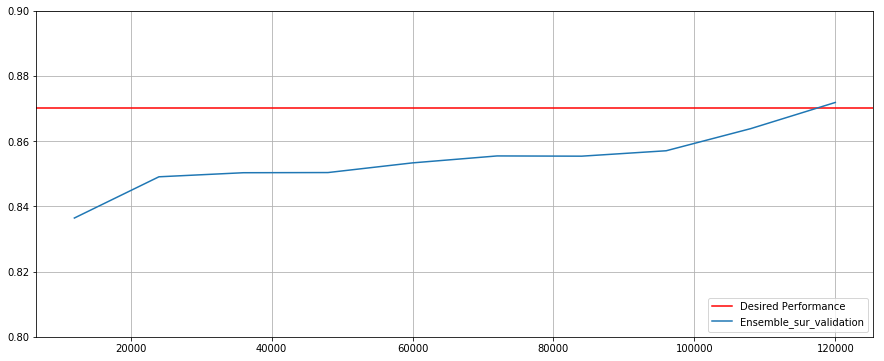

In [77]:
# performance ensemble train sur validation
plt.grid()
plt.axhline(y=0.87, color = 'red', label="Desired Performance")
plt.ylim(0.8,0.9)
plt.plot(train_size, auc_ens_val, label= "Ensemble_sur_validation")
plt.legend(loc='lower right')

In [78]:
# fonction de creation de graphe en fonction des pred
def graph(list1, list2, list3):
    plt.grid()
    plt.axhline(y=0.87, color= 'red', label="Desired Performance")
    plt.rcParams['figure.figsize'] = [15 , 6]
    plt.ylim(0.80,1)
    plt.plot(list1, list2, color= 'blue')
    plt.plot(list1, list3, color= 'green')
    plt.legend(loc='lower right')
    plt.show()

## affichage des graphiques

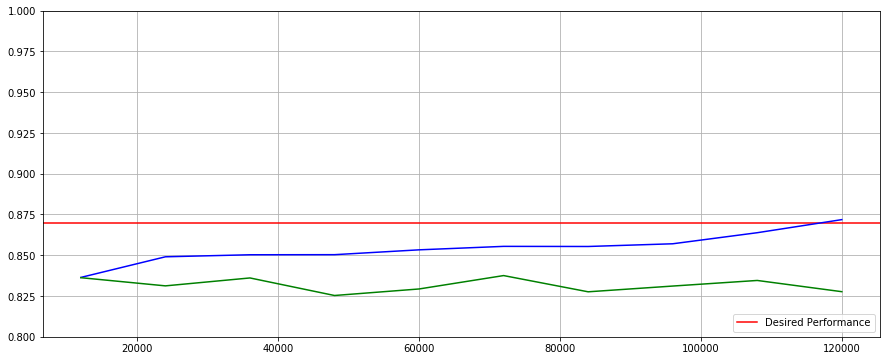

In [79]:
# model ensemble (bleu) vs deepnet (vert) sur validation
graph(train_size, auc_ens_val, auc_dee_val)

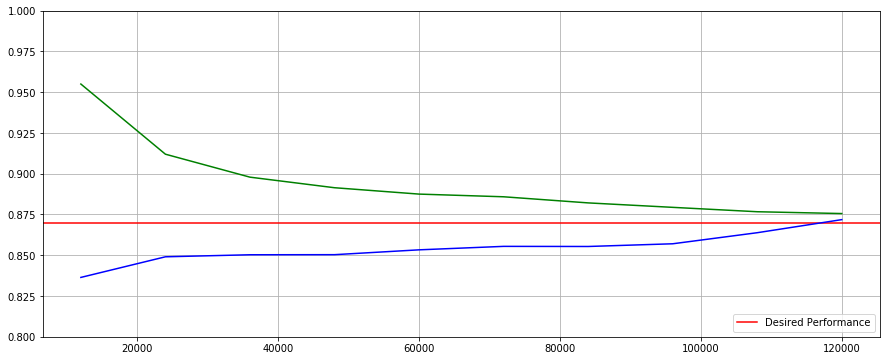

In [80]:
# model ensemble sur validation (bleu) vs sur split (vert)
graph(train_size, auc_ens_val, auc_ens_spl)

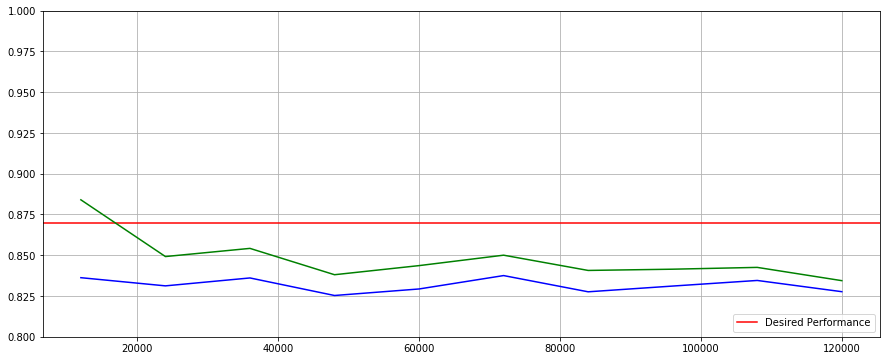

In [81]:
# model deepnet sur validation (bleu) vs sur split (vert)
graph(train_size, auc_dee_val, auc_dee_spl)